In [1]:
# === Dummy Visualization for Cassiterite Mask R-CNN (No Model Needed) ===
import os, json, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


In [2]:
# ---------------------------
# Path setup
# ---------------------------
img_path = "dataset142/0359-19100E.jpg"   # ubah path gambar
json_path = "dataset142/0359-19100E.json"  # ubah path JSON LabelMe

# ---------------------------
# Load data
# ---------------------------
image = Image.open(img_path).convert("RGB")
img_np = np.array(image).copy()
height, width = img_np.shape[:2]

# Load annotation (LabelMe format)
with open(json_path) as f:
    data = json.load(f)

# Extract GT masks & boxes
gt_masks, gt_boxes = [], []
for shape in data["shapes"]:
    if shape["shape_type"] == "polygon":
        pts = np.array(shape["points"], dtype=np.int32)
        mask = np.zeros((height, width), np.uint8)
        cv2.fillPoly(mask, [pts], 1)
        gt_masks.append(mask)
        x_min, y_min = pts.min(axis=0)
        x_max, y_max = pts.max(axis=0)
        gt_boxes.append([x_min, y_min, x_max, y_max])

gt_masks = np.stack(gt_masks) if len(gt_masks) > 0 else np.zeros((0, height, width))
gt_boxes = np.array(gt_boxes)

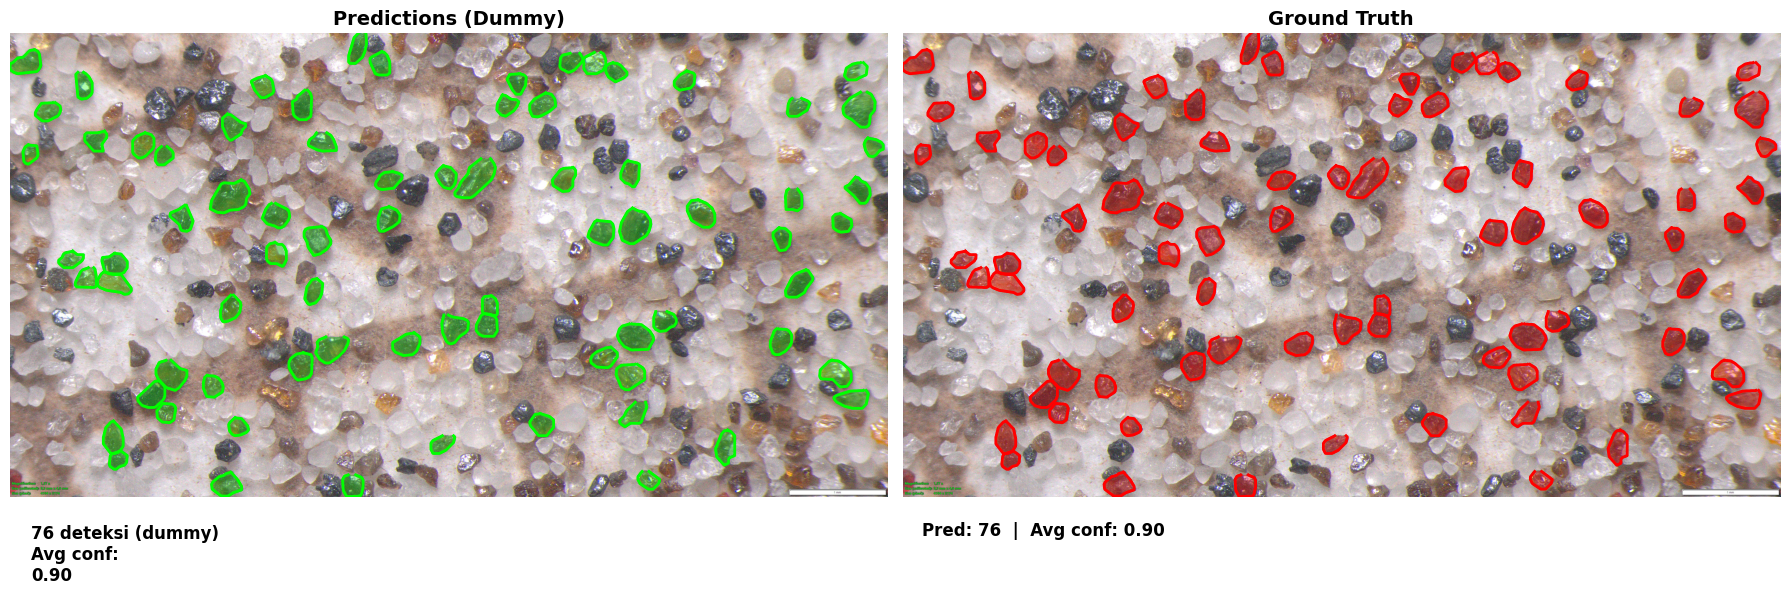

In [27]:
# ---------------------------
# Dummy prediction (same as GT)
# ---------------------------
pred_masks = gt_masks.copy()
pred_boxes = gt_boxes.copy()
pred_scores = np.random.uniform(0.8, 1.0, size=len(pred_boxes))  # dummy confidence

# ---------------------------
# Visualization
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# ---- Left: Dummy Prediction ----
ax = axes[0]
ax.imshow(img_np)
ax.set_title("Predictions (Dummy)", fontsize=14, fontweight='bold')
ax.axis("off")

for box, mask, score in zip(pred_boxes, pred_masks, pred_scores):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cnt = cnt.squeeze()
        if cnt.ndim == 2:
            ax.plot(cnt[:, 0], cnt[:, 1], 'lime', linewidth=2)
            ax.fill(cnt[:, 0], cnt[:, 1], 'lime', alpha=0.3)

# ax.text(10, 25, f"{len(pred_boxes)} deteksi (dummy)\nAvg conf: {pred_scores.mean():.2f}", 
#         color="white", fontsize=12, bbox=dict(boxstyle="round", facecolor="green", alpha=0.7))

# ---- Right: Ground Truth ----
ax = axes[1]
ax.imshow(img_np)
ax.set_title("Ground Truth", fontsize=14, fontweight='bold')
ax.axis("off")

for mask in gt_masks:
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cnt = cnt.squeeze()
        if cnt.ndim == 2:
            ax.plot(cnt[:, 0], cnt[:, 1], 'red', linewidth=2)
            ax.fill(cnt[:, 0], cnt[:, 1], 'red', alpha=0.3)

# ax.text(10, 25, f"{len(gt_boxes)} objek GT", 
#         color="white", fontsize=12, bbox=dict(boxstyle="round", facecolor="red", alpha=0.7))

# Add metrics text at bottom left and right
fig.text(0.02, 0.15,
         f"{len(pred_boxes)} deteksi (dummy)\nAvg conf: \n{pred_scores.mean():.2f}",
         ha='left', fontsize=12, fontweight='bold',
        #  bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8)
        )

fig.text(0.65, 0.2,
         f'Pred: {len(pred_boxes)}  |  Avg conf: {pred_scores.mean():.2f}',
         ha='right', fontsize=12, fontweight='bold',
        #  bbox=dict(boxstyle='round', facecolor='green', alpha=0.8)
        )

plt.tight_layout()
plt.show()
